<a href="https://colab.research.google.com/github/Sneha-Devare/Water_Shop_Analytics/blob/main/Copy_of_Water_Shop_Analytics_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Water Shop Analytics ML Project**

In [16]:
# Water Shop Analytics ML Project

#### **Project Overview**
The Water Shop Analytics System is a business-focused solution designed to provide clear visibility into customer visits, water can sales, payment behavior, and shop operations using CCTV footage. The system replaces manual tracking with automated insights to support better business decisions.

In [17]:
# Installation of YOLO
!pip install ultralytics    # Ultralytics is a library that created modern YOLO models

In [18]:
# Loading YOLO model
from ultralytics import YOLO     # Importing YOLO model from Ultralytics
# We use yolov8s.pt because it gives better detection accuracy and running fast
model = YOLO('yolov8s.pt')
print('Model Loaded')

Model Loaded


In [19]:
# Importing matplotlotlib
# We are importing matplotlib to show images inside the notebook
import matplotlib.pyplot as plt


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 421.4ms
Speed: 3.4ms preprocess, 421.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'h

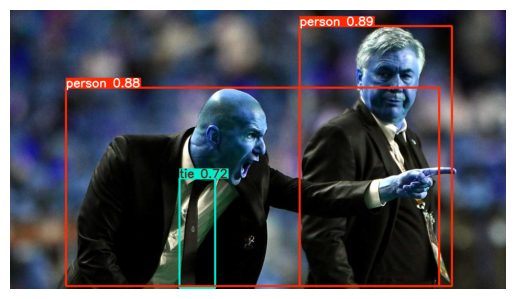

In [22]:
# Testing if a model can detect objects in an image
results = model("https://ultralytics.com/images/zidane.jpg")   # Sends an image to the YOLO model to detect objects
# Detection result stored in results object
# .plot() method draws bounding boxes around detected objects and adds labels to the image.
img = results[0].plot()      # It draws boxes and labels on the image and saves the new image in img.
plt.imshow(img)                 # Displaying image
plt.axis("off")         # No axis shown
print(results[0].names)        # All possible classes that model knows
print(results[0].boxes.cls)     # Shows classes which are detected